#                                       # Telco Customer Churn.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read in the csv file
telco_churn = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
telco_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
telco_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
#converting senior citizen to object type
telco_churn['SeniorCitizen'] = telco_churn['SeniorCitizen'].astype('object')
telco_churn.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
duplicate=telco_churn['customerID'].duplicated(keep=False)
duplicate.head()

0    False
1    False
2    False
3    False
4    False
Name: customerID, dtype: bool

## Demographic.

#### Which 2 demographics have proven to be the most popular with the telco brand?

In [6]:
popular_demo = telco_churn.iloc[:,[1,2,3,4,20]]
popular_demo.head()

,gender,SeniorCitizen,Partner,Dependents,Churn
0,Female,0,Yes,No,No
1,Male,0,No,No,No
2,Male,0,No,No,Yes
3,Male,0,No,No,No
4,Female,0,No,No,Yes


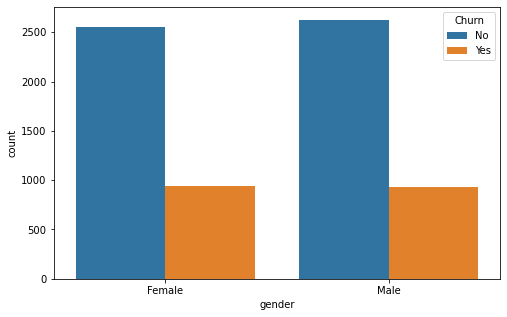

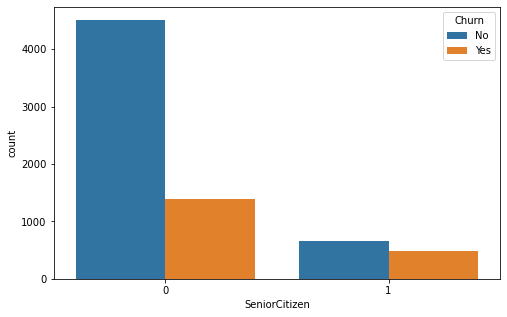

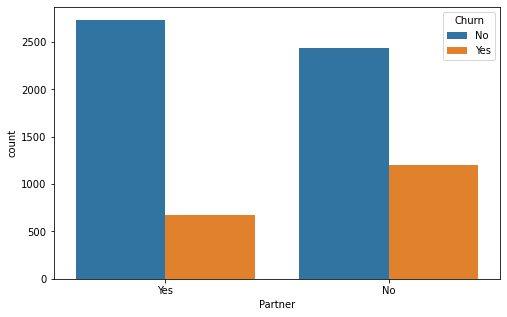

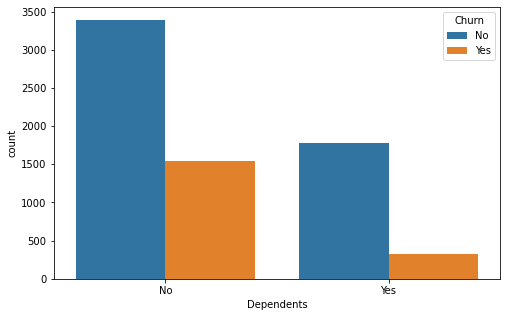

In [7]:
for col in ['gender','SeniorCitizen','Partner','Dependents']:
    plt.figure(figsize=(8,5))
    sns.countplot(x=col,hue='Churn',data=popular_demo,palette='tab10')
    plt.show()

the two most common demographics are customers who are not senior citizens and those who are independent financially. This information is based on all people who have been customers of telco irrespective of whether they have now left.

#### If the marketing team wanted to increase customer retention, to whom should they target their advertisements to?

In [8]:
#dataframe for churning customers
churn_yes = telco_churn[telco_churn['Churn'] == 'Yes']
churn_yes.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes


In [9]:
advert_df = churn_yes.iloc[:,[1,2,3,4]]
advert_df.head()

,gender,SeniorCitizen,Partner,Dependents
2,Male,0,No,No
4,Female,0,No,No
5,Female,0,No,No
8,Female,0,Yes,No
13,Male,0,No,No


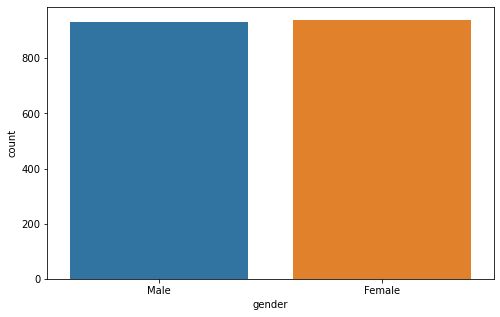

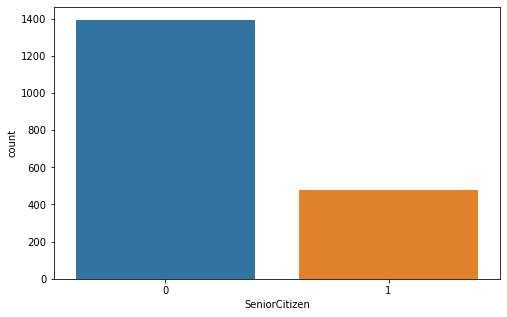

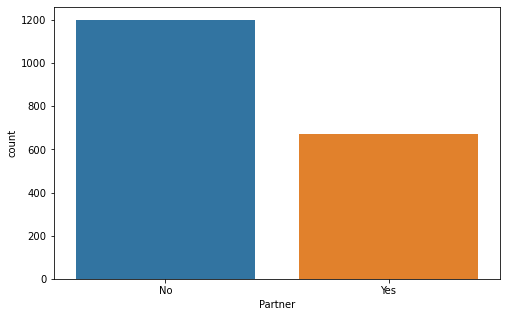

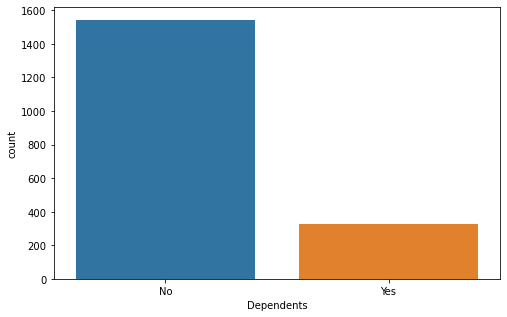

In [10]:
for col in ['gender','SeniorCitizen','Partner','Dependents']:
    plt.figure(figsize=(8,5))
    sns.countplot(x=col,data=advert_df,palette='tab10')
    plt.show()

The highest attrition is non senior citizens who are single and independent. This should be the target demographic for advertisers.

## Services.

#### Which 3 services are contributing to a higher monthly charge and resulting to customers churning? (Use visualizations in explaining your analysis)

In [11]:
#considering only cases where there is attrition
service_df = churn_yes.iloc[:,[6,7,8,9,10,11,12,13,14,18,20]]
service_df

,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MonthlyCharges,Churn
2,Yes,No,DSL,Yes,Yes,No,No,No,No,53.85,Yes
4,Yes,No,Fiber optic,No,No,No,No,No,No,70.70,Yes
5,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,99.65,Yes
8,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,104.80,Yes
13,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,103.70,Yes
...,...,...,...,...,...,...,...,...,...,...,...
7021,Yes,No,DSL,No,No,No,Yes,Yes,No,59.80,Yes
7026,Yes,No,DSL,No,No,No,No,No,No,44.20,Yes
7032,Yes,Yes,Fiber optic,No,No,No,No,No,No,75.75,Yes
7034,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,102.95,Yes


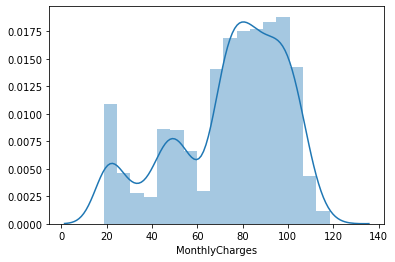

In [12]:
sns.distplot(service_df['MonthlyCharges'])

from the histogram, it is clear that most customers have attritioned due to high Monthly Charges. upon further investigation of this section.

In [13]:
high_df = service_df[service_df['MonthlyCharges'] > 80]
high_df

,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MonthlyCharges,Churn
5,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,99.65,Yes
8,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,104.80,Yes
13,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,103.70,Yes
26,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,99.35,Yes
38,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,106.35,Yes
...,...,...,...,...,...,...,...,...,...,...,...
6991,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,95.65,Yes
6993,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,88.05,Yes
7006,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,104.50,Yes
7009,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,81.00,Yes


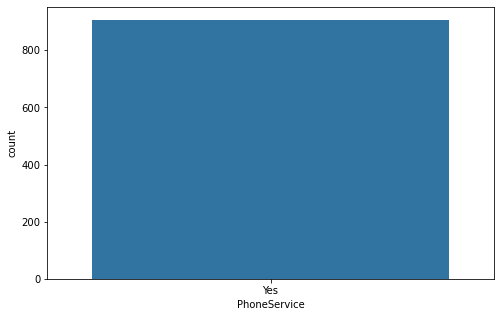

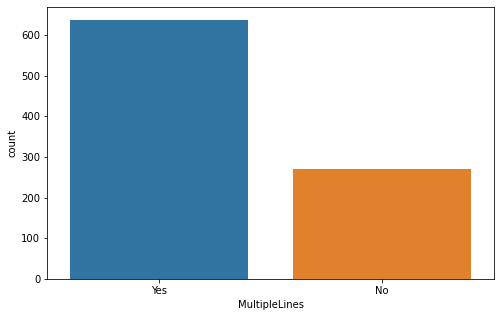

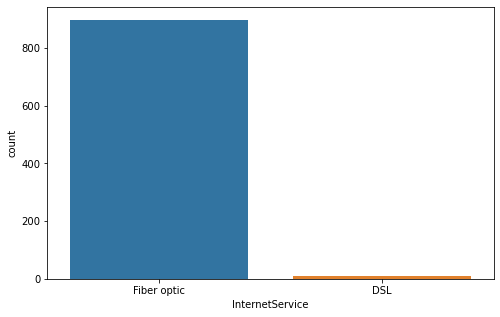

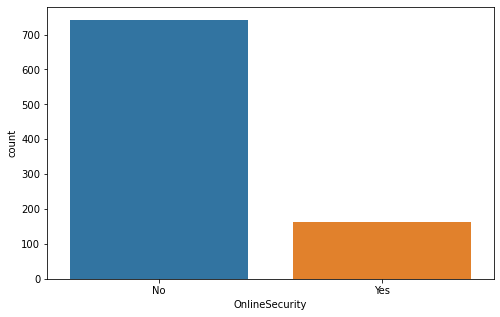

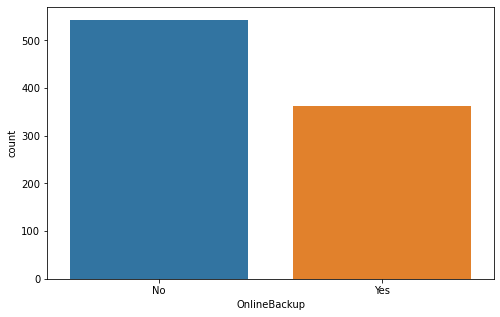

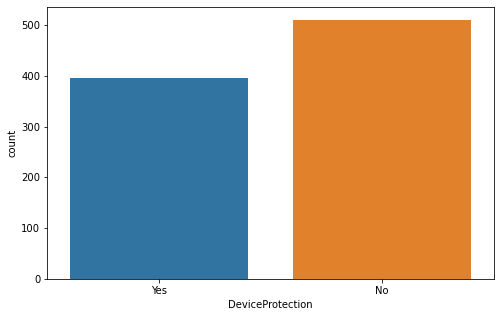

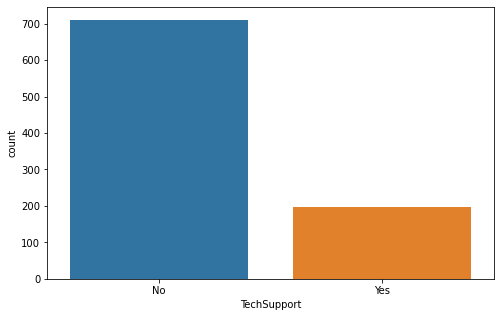

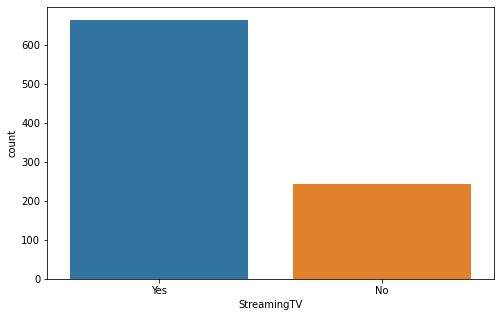

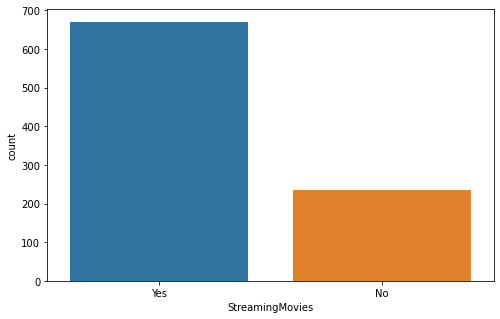

In [14]:
for col in ['PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']:
    plt.figure(figsize=(8,5))
    sns.countplot(x=col,data=high_df)
    plt.show()

The three most common services offered at this high monthly charges leading to high attrition are Fiber optic Internet Service, TV streaming service and Movie streaming service.

#### b. If the telco was to offer Phone as a standalone service, which type of contract would encourage customer retention?

In [15]:
#dataframe for non-churning customers
churn_No = telco_churn[telco_churn['Churn'] == 'No']
churn_No.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No


In [16]:
phone_df = churn_No[['PhoneService','Contract']]
phone_df['count'] = 1
phone_df.head()

<ipython-input-16-18dba4efd862>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phone_df['count'] = 1


,PhoneService,Contract,count
0,No,Month-to-month,1
1,Yes,One year,1
3,No,One year,1
6,Yes,Month-to-month,1
7,No,Month-to-month,1


In [17]:
grouped_df = phone_df.groupby(['Contract','PhoneService'])['count'].count().reset_index()
grouped_df

,Contract,PhoneService,count
0,Month-to-month,No,223
1,Month-to-month,Yes,1997
2,One year,No,131
3,One year,Yes,1176
4,Two year,No,158
5,Two year,Yes,1489


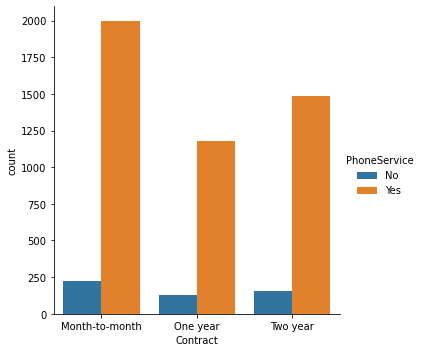

In [18]:
sns.catplot(data=grouped_df, x= 'Contract',y= 'count', hue= 'PhoneService',kind= 'bar')

the month to month contract type would offer the highest customer retention if telco was to offer phone as a stand alone service.

## Payment. (Use visualizations in explaining your analysis)

#### If the company was to streamline all its services into 3 bouquet packages, what monthly prices will be appropriate for the following packages to keep customers from churning:
i. Basic
ii. Plus
iii. Premium


In [19]:
package = telco_churn[['MonthlyCharges','Churn']]
package.head()

,MonthlyCharges,Churn
0,29.85,No
1,56.95,No
2,53.85,Yes
3,42.30,No
4,70.70,Yes


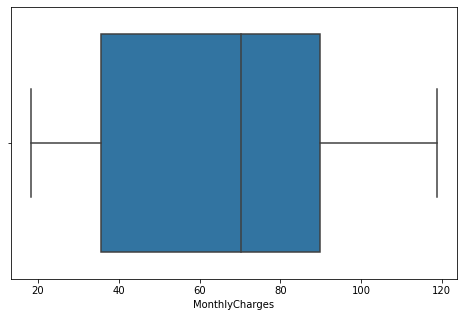

In [20]:
#getting a statistical breakdown of the Monthly charge
plt.figure(figsize=(8,5))
sns.boxplot(x='MonthlyCharges',data=package)

Have a basic package with a monthly charge of about 30 for the basic package, a plus package with amonthly charge of about 70 and a premium package with the monthly charge of about 105.

#### Should the company strictly go paperless for their monthly billings as a technique of keeping their customers and why?

In [21]:
bill_df = telco_churn[['PaperlessBilling','Churn']]
bill_df['count']=1
bill_df.head()

<ipython-input-21-ffe2b78dc065>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bill_df['count']=1


,PaperlessBilling,Churn,count
0,Yes,No,1
1,No,No,1
2,Yes,Yes,1
3,No,No,1
4,Yes,Yes,1


In [22]:
paperless = bill_df.groupby(['PaperlessBilling','Churn'])['count'].count().reset_index()
paperless

,PaperlessBilling,Churn,count
0,No,No,2403
1,No,Yes,469
2,Yes,No,2771
3,Yes,Yes,1400


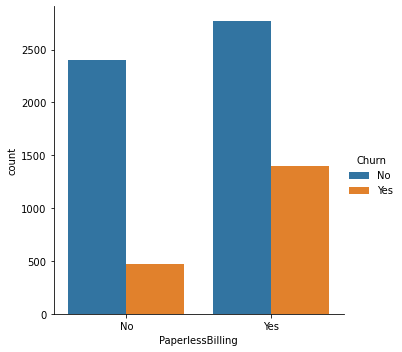

In [23]:
sns.catplot(data=paperless,x='PaperlessBilling',y='count',hue='Churn',kind='bar')

No. Of the customers left, the distribution is almost equal for those using paperless billing and those not into paperless billing. Furthermore, majority of those who have left used paperless billing. Thus it is not advisable to move strictly to paperless billing